1. IMPORT LIBRARIES

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use("ggplot")
sns.set_palette("Set2")


2. Load Dataset

In [22]:
df = pd.read_csv("bank_churn_dataset.csv")

df.head()


,CustomerID,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn
0,1,452,Germany,Female,56,8,52341.96,2,1,1,73070.56,1
1,2,785,France,Female,72,2,39108.80,4,1,1,45496.83,0
2,3,698,Spain,Female,45,7,111236.90,1,1,0,47527.75,1
3,4,620,France,Male,35,2,154907.94,3,1,1,86061.49,0
4,5,456,Spain,Female,58,6,212669.67,4,0,1,19941.45,0


3. Basic Info

In [23]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       10000 non-null  int64  
 1   CreditScore      10000 non-null  int64  
 2   Geography        10000 non-null  object 
 3   Gender           10000 non-null  object 
 4   Age              10000 non-null  int64  
 5   Tenure           10000 non-null  int64  
 6   Balance          10000 non-null  float64
 7   NumOfProducts    10000 non-null  int64  
 8   HasCrCard        10000 non-null  int64  
 9   IsActiveMember   10000 non-null  int64  
 10  EstimatedSalary  10000 non-null  float64
 11  Churn            10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


,CustomerID,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,5000.50000,599.809200,54.111900,4.577100,124638.051266,2.480500,0.507200,0.504200,104973.343608,0.33300
std,2886.89568,144.393617,21.330698,2.865393,72261.061139,1.120065,0.499973,0.500007,54695.243552,0.47131
min,1.00000,350.000000,18.000000,0.000000,1.380000,1.000000,0.000000,0.000000,10051.320000,0.00000
25%,2500.75000,475.000000,35.000000,2.000000,62460.430000,1.000000,0.000000,0.000000,58186.217500,0.00000
50%,5000.50000,600.000000,54.000000,5.000000,124436.210000,2.000000,1.000000,1.000000,104876.975000,0.00000
75%,7500.25000,726.250000,72.000000,7.000000,187451.837500,3.000000,1.000000,1.000000,152905.700000,1.00000
max,10000.00000,849.000000,91.000000,9.000000,249972.640000,4.000000,1.000000,1.000000,199941.080000,1.00000


4. Clean Column Names

In [24]:
df.columns = df.columns.str.strip().str.lower()

df.columns


Index(['customerid', 'creditscore', 'geography', 'gender', 'age', 'tenure',
       'balance', 'numofproducts', 'hascrcard', 'isactivemember',
       'estimatedsalary', 'churn'],
      dtype='object')

5. Check Target Column

In [25]:
df['churn'].value_counts()

churn
0    6670
1    3330
Name: count, dtype: int64

EDA Visualizations

1. Churn Distribution

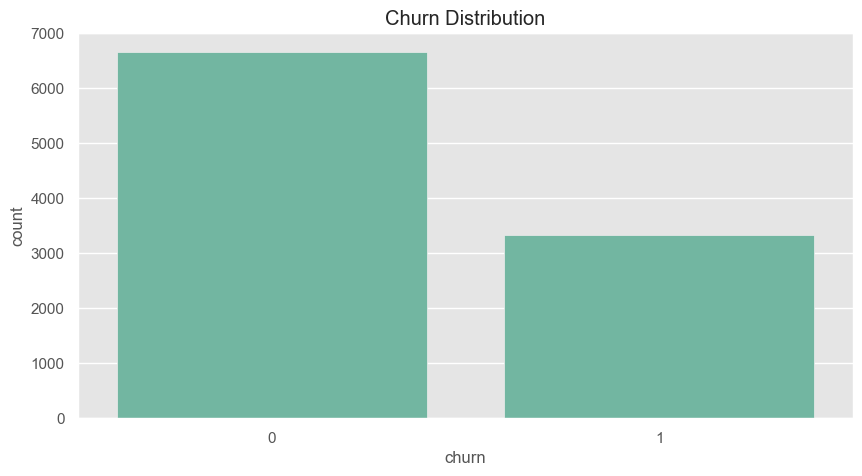

In [26]:
sns.countplot(x='churn', data=df)
plt.title("Churn Distribution")
plt.show()


2. Churn by Geography

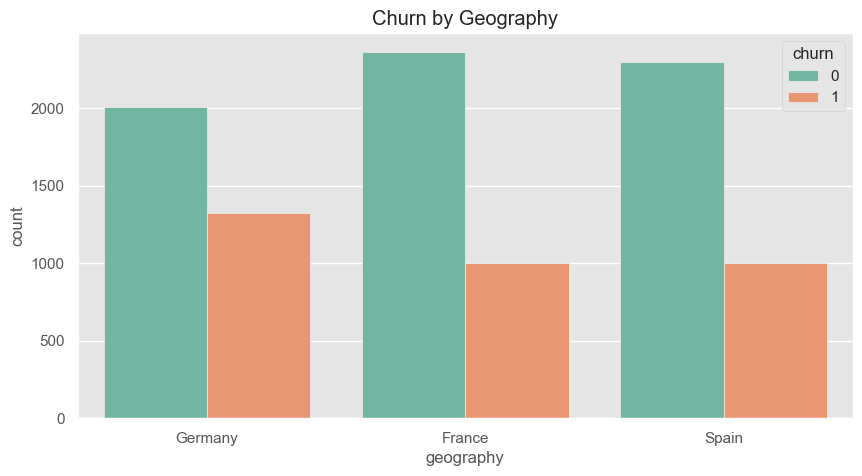

In [27]:
sns.countplot(x='geography', hue='churn', data=df)
plt.title("Churn by Geography")
plt.show()


3. Churn by Gender

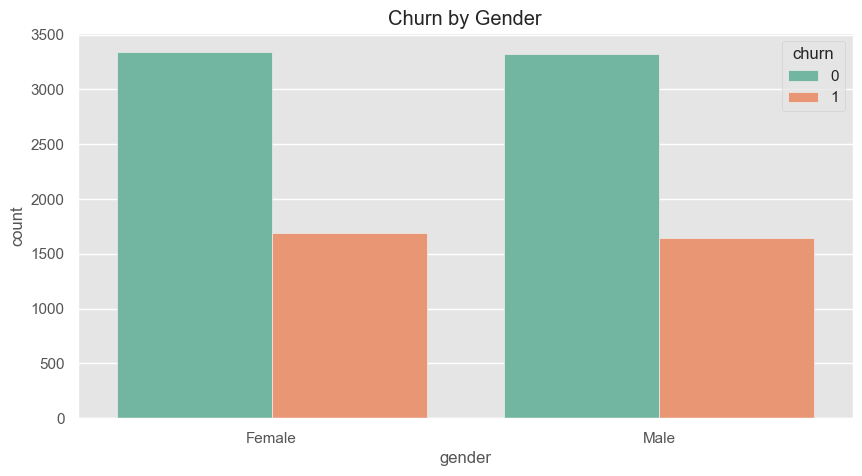

In [28]:
sns.countplot(x='gender', hue='churn', data=df)
plt.title("Churn by Gender")
plt.show()


4. Churn by Tenure

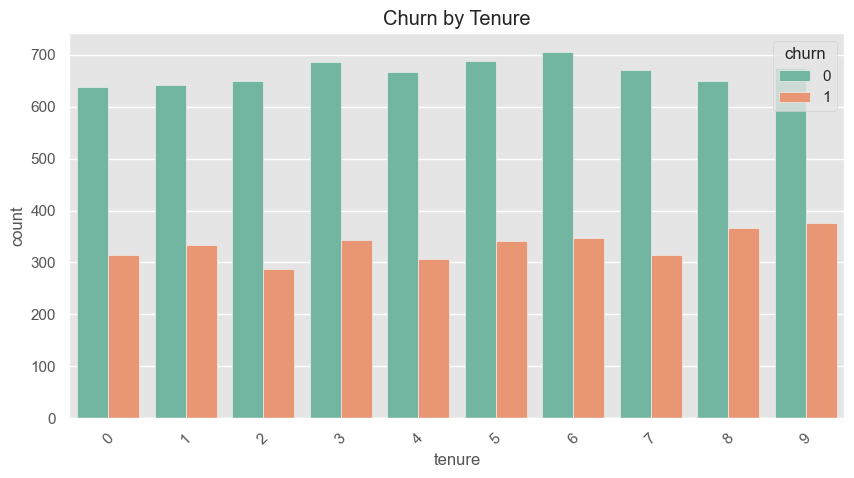

In [29]:
sns.countplot(x='tenure', hue='churn', data=df)
plt.title("Churn by Tenure")
plt.xticks(rotation=45)
plt.show()


5. Balance vs Churn (Boxplot)

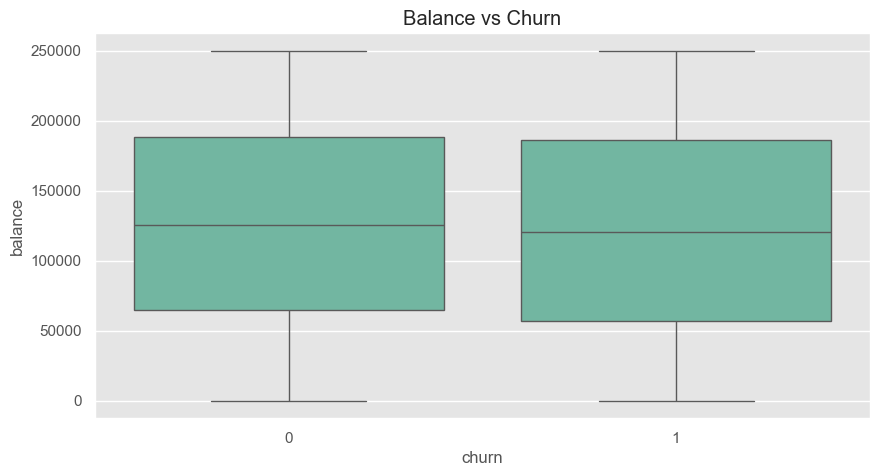

In [30]:
sns.boxplot(x='churn', y='balance', data=df)
plt.title("Balance vs Churn")
plt.show()


6. Salary vs Churn (Boxplot)

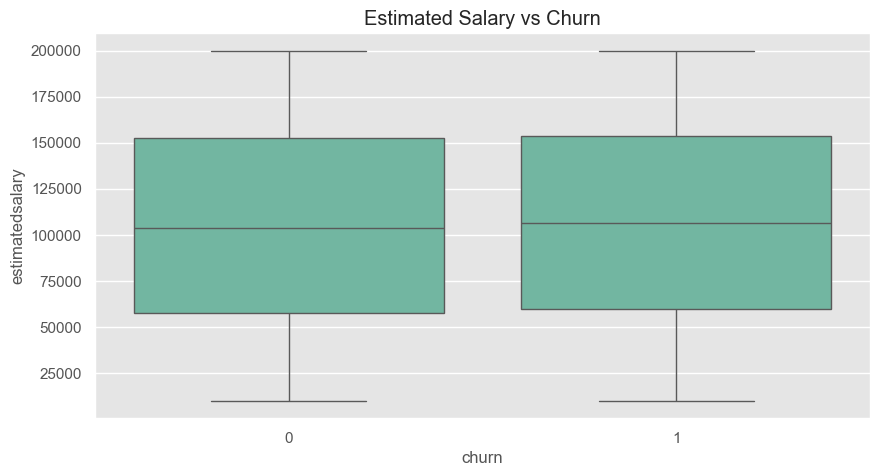

In [37]:
sns.boxplot(x='churn', y='estimatedsalary', data=df)
plt.title("Estimated Salary vs Churn")
plt.show()


7. Number of Products vs Churn

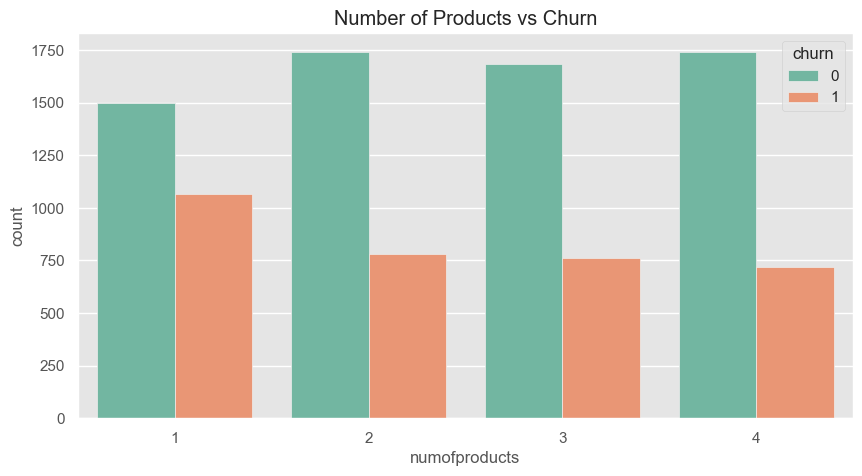

In [32]:
sns.countplot(x='numofproducts', hue='churn', data=df)
plt.title("Number of Products vs Churn")
plt.show()


8. Activity vs Churn

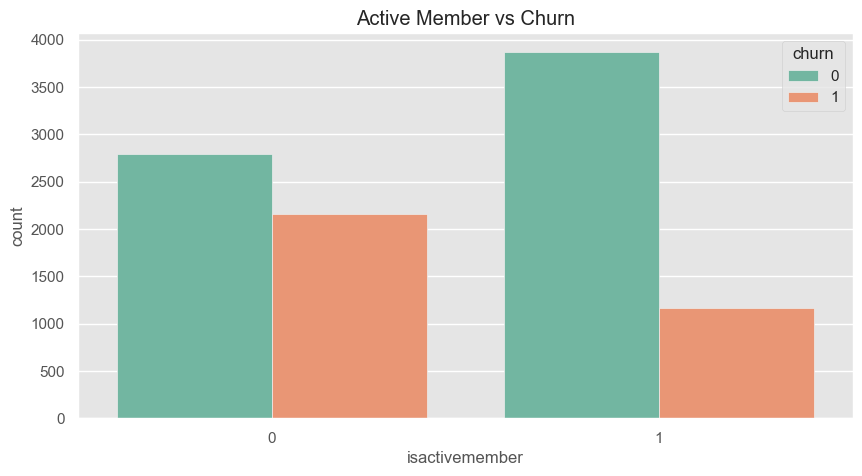

In [35]:
sns.countplot(x='isactivemember', hue='churn', data=df)
plt.title("Active Member vs Churn")
plt.show()


9. Correlation Heatmap

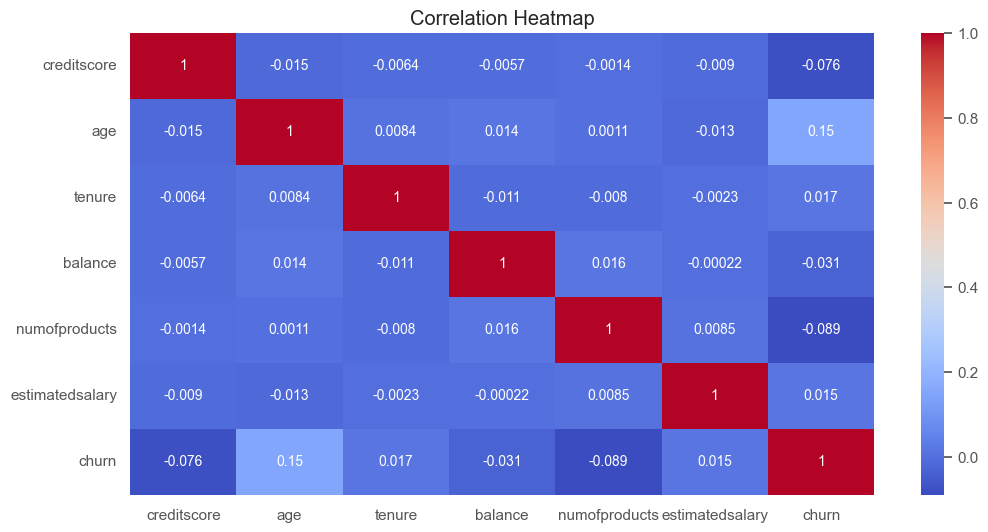

In [34]:
plt.figure(figsize=(12,6))

numeric_df = df[['creditscore','age','tenure','balance',
                 'numofproducts','estimatedsalary','churn']]

sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()
